In [2]:
import sys
sys.path.append("..")

In [3]:
from pathlib import Path
root_path = Path().resolve()
print(root_path)

/Users/seobi/PythonProjects/RAG_Commander/src/lab


In [4]:
from utils.util import get_project_root
get_project_root()

PosixPath('/Users/seobi/PythonProjects/RAG_Commander')

In [5]:
from prompts import PromptType
PromptType.MAIN_START_CONFIRMATION.path

'/Users/seobi/PythonProjects/RAG_Commander/src/prompts/main.yaml'

In [6]:
from prompts import PromptManager
PromptManager(PromptType.MAIN_START_CONFIRMATION).get_prompt(messages = [])

'아래는 지금까지 사용자가 부동산 대행사 사내용 보고서 작성을 요청하며 주고 받은 메시지 입니다. \n<Messages>\n[]\n</Messages>\n\n사용자가 제공한 정보만으로 보고서 작성을 시작할 수 있는지,\n아니면 추가로 질문을 해야 하는지 판단해야 합니다.\n\n보고서 작성 여부는 아래와 같습니다.\n** 위치, 규모, 세대수 ** 중 1가지라도 없다면 필수로 명확하기 위한 질문을 해야합니다. \n\n중요: 만약 이미 명확히 하기 위한 질문을 한적이 없다면,\n다시 질문하지마세요. 정말 필요할 떄만 새로 질문을 하세요. \n\n약어나 모호한 용어, 의미 불분명한 표헌이 있다면 사용자가 명확히 해주도록 요청하십시오.\n\n질문이 필요한 경우 다음 가이드를 따르세요:\n- 불필요한 장황함 없이 필요한 정보만 간결히 물어보세요.\n- 보고서 작성에 꼭 필요한 모든 정보를 잘 구조화해 요청하세요. \n- 필요하다면 마크다운 서식이 적용되는 **리스트나 번호 목록**으로 작성하세요. \n- 이미 사용자가 제공한 정보를 반복해서 묻지 마세요. \n\n다음과 같은 JSON 형식으로 응답해야 합니다:\n"confirm": boolean, \n"question": "<사용자에게 명확하기 위한 질문>",\n"reason": "<사용자에게 명확하기 위한 질문이 필요한 이유>"\n"verification": "<충분한 정보가 있을 때 보고서 작성 시작을 알리는 메시지>"\n\n명확하기 위한 질문이 필요한 경우:\n"confirm": False, \n"question": "<당신의 질문>",\n"reason": "<사용자에게 명확하기 위한 질문이 필요한 이유>"\n"verification": ""\n\n\n명확하기 위한 질문이 **필요하지 않은 경우*:\n"confirm": True, \n"question": "",\n"reason": ""\n"verification": "<보고서 작성을 시작하겠다는 확인 메시지>"\n\nverfication 메시지 작성 규칙:\n- 

In [7]:
# import yaml

# with open("../prompts/insight_division_prompts.yaml", "r", encoding="utf-8") as f:
#     config = yaml.safe_load(f)

# print(config["agents"][0]["system"])
# common_system = config["common_system"]  
# agents = config["agents"]                
# loc_cfg = next(a for a in agents if a["id"] == "location_insight")
# loc_cfg

/Users/seobi/PythonProjects/RAG_Commander/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


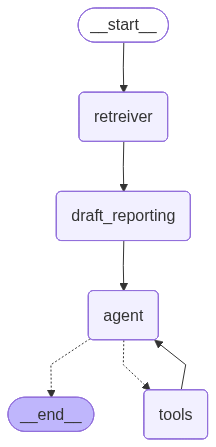

In [8]:
from agents.jung_min_jae.jung_min_jae_agent import report_graph
report_graph